In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib auto
sns.set(style="darkgrid")
MODELS_LOG = "../model_logs"

Using matplotlib backend: TkAgg


In [39]:
models_dir = [x for x in os.listdir(MODELS_LOG)]
models_for_plot = sorted(models_dir, key=lambda x: int(x[-3]))

In [41]:
settings = [[config[-1] for config in model_for_plot.split("_")[0].split(".")[1:]] for model_for_plot in models_for_plot]

In [42]:
settings

[['1', '0'], ['1', '1'], ['1', '2'], ['1', '3'], ['1', '4']]

100%|██████████| 5/5 [00:00<00:00, 51.82it/s]


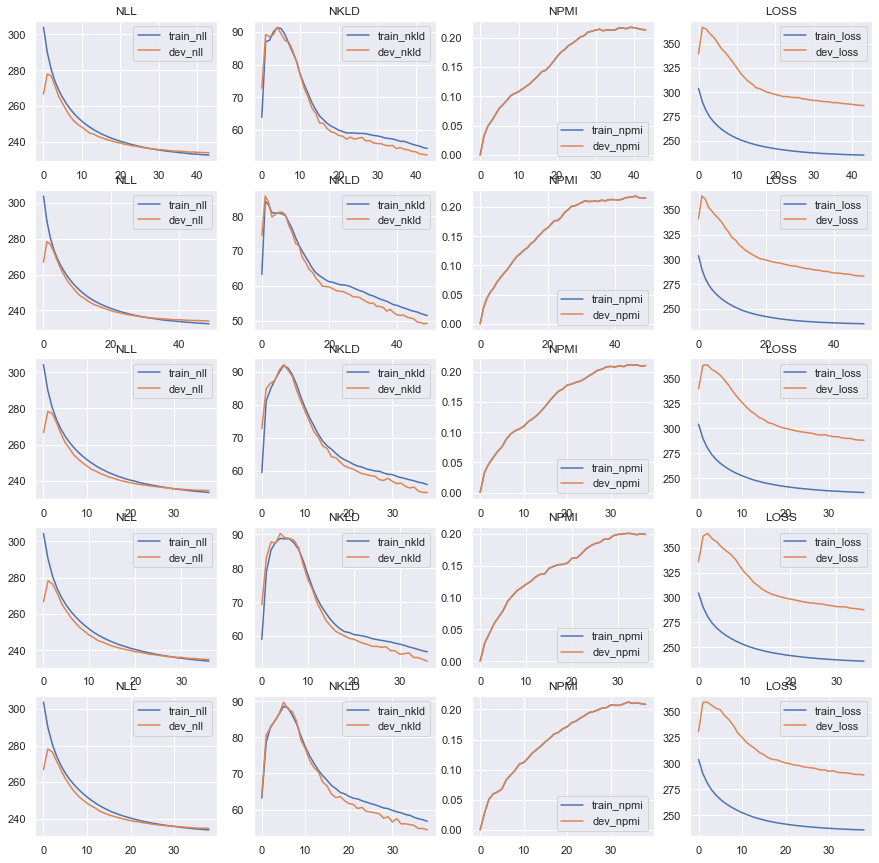

In [43]:
%matplotlib inline
fig, axes = plt.subplots(nrows=len(models_for_plot), ncols=4,  figsize=(15,3 * len(models_for_plot)))

metrics = [None for i in range(len(models_for_plot))]
metrics_json = [None for i in range(len(models_for_plot))]

all_training_nll = []
all_training_nkld = []
all_training_npmi = []
all_training_loss = []

all_validation_nll = []
all_validation_nkld = []
all_validation_npmi = []

all_validation_loss = []


min_training_nll = []
min_training_nkld = []
max_training_npmi = []
min_training_loss = []

min_validation_nll = []
min_validation_nkld = []
max_validation_npmi = []
min_validation_loss = []


for i in tqdm(range(len(models_for_plot))):
    model_dir = f"{MODELS_LOG}/{models_for_plot[i]}"
    metrics[i] = [y for x in os.walk(model_dir) for y in glob(os.path.join(x[0], 'metrics_epoch_*.json'))]
    metrics[i] = sorted(metrics[i], key=lambda x: int(x.split("_")[-1].split(".")[0]))
    metrics_json[i] = [json.load(open(metric, "r")) for metric in metrics[i]]
    
    training_nll = [metric["training_nll"] for metric in metrics_json[i]]
    if len(training_nll) == 0:
        continue
    training_nkld = [metric["training_nkld"] for metric in metrics_json[i]]
    training_npmi = [metric["training_npmi"] for metric in metrics_json[i]]
    training_loss = [metric["training_loss"] for metric in metrics_json[i]]
    
    validation_nll = [metric["validation_nll"] for metric in metrics_json[i]]
    validation_nkld = [metric["validation_nkld"] for metric in metrics_json[i]]
    validation_npmi = [metric["validation_npmi"] for metric in metrics_json[i]]
    validation_loss = [metric["validation_loss"] for metric in metrics_json[i]]
    
    min_training_nll.append(min(training_nll))
    min_training_nkld.append(min(training_nkld))
    max_training_npmi.append(max(training_npmi))
    min_training_loss.append(min(training_loss))
    
    min_validation_nll.append(min(validation_nll))
    min_validation_nkld.append(min(validation_nkld))
    max_validation_npmi.append(max(validation_npmi))
    min_validation_loss.append(min(validation_loss))
    
    all_training_nll.append(training_nll)
    all_training_nkld.append(training_nkld)
    all_training_npmi.append(training_npmi)
    all_training_loss.append(training_loss)
    
    all_validation_nll.append(validation_nll)
    all_validation_nkld.append(validation_nkld)
    all_validation_npmi.append(validation_npmi)
    all_validation_loss.append(validation_loss)
    
    epochs = [metric["epoch"] for metric in metrics_json[i]]
#     ax = fig.add_subplot(len(models_dir), 4 , 4 * i + 1)
    axes[i, 0].title.set_text("NLL")
    axes[i, 0].plot(epochs, training_nll, label="train_nll")
    axes[i, 0].plot(epochs, validation_nll, label="dev_nll")
    axes[i, 0].legend()
    
#     ax = fig.add_subplot(len(models_dir), 4, 4 * i + 2)
    axes[i, 1].title.set_text("NKLD")
    axes[i, 1].plot(epochs, training_nkld, label="train_nkld")
    axes[i, 1].plot(epochs, validation_nkld, label="dev_nkld")
    axes[i, 1].legend()
    
#     ax = fig.add_subplot(len(models_dir), 4, 4 * i + 3)
    axes[i, 2].title.set_text("NPMI")
    axes[i, 2].plot(epochs, training_npmi, label="train_npmi")
    axes[i, 2].plot(epochs, validation_npmi, label="dev_npmi")
    axes[i, 2].legend()
    
#     ax = fig.add_subplot(len(models_dir),4, 4 * i + 4)
    axes[i, 3].title.set_text("LOSS")
    axes[i, 3].plot(epochs, training_loss, label="train_loss")
    axes[i, 3].plot(epochs, validation_loss, label="dev_loss")
    axes[i, 3].legend()


plt.savefig(f"models.png")
plt.show()

In [45]:
metrics

[['../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_0.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_1.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_2.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_3.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_4.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_5.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_6.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_7.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_8.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_9.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_10.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_11.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_6/metrics_epoch_12.json',
  '../model_logs/partial-gen.DocInfo1.NoRepeat0_

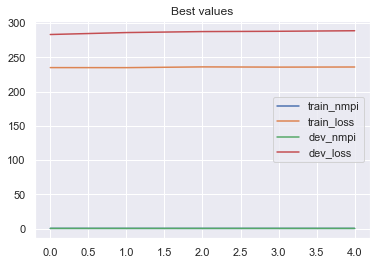

In [17]:
trials = [i for i in range(len(min_validation_loss))]

plt.title("Best values")
# plt.plot(trials, min_training_nll, label="train_nll")
# plt.plot(trials, min_training_nkld, label="train_nkld")
plt.plot(trials, max_training_npmi, label="train_nmpi")
plt.plot(trials, min_training_loss, label="train_loss")
# plt.plot(trials, min_validation_nll, label="dev_nll")
# plt.plot(trials, min_validation_nkld, label="dev_nkld")
plt.plot(trials, max_validation_npmi, label="dev_nmpi")
plt.plot(trials, min_validation_loss, label="dev_loss")
plt.legend()
plt.show()

In [29]:
max_epoch = [len(elm) for elm in all_training_nll]

In [ ]:
import numpy as np

arr = np.ma.empty((2,3,3))
arr.mask = True
arr[:x.shape[0],:x.shape[1],0] = x
arr[:y.shape[0],:y.shape[1],1] = y
arr[:z.shape[0],:z.shape[1],2] = z
print(arr.mean(axis = 2))

In [33]:
all_training_nll_npy = np.array(all_training_nll)
all_training_nkld_npy = np.array(all_training_nkld)
all_training_npmi_npy = np.array(all_training_npmi)
all_training_loss_npy = np.array(all_training_loss)

all_validation_nll_npy = np.array(all_validation_nll)
all_validation_nkld_npy = np.array(all_validation_nkld)
all_validation_npmi_npy = np.array(all_validation_npmi)
all_validation_loss_npy = np.array(all_validation_loss)

In [ ]:
for training_nll in all_training_nll:
    

In [265]:
rows = [settings[i] + [min_training_nll[i], 
                       min_training_nkld[i],
                       max_training_npmi[i], 
                       min_training_loss[i], 
                       min_validation_nll[i],
                       min_validation_nkld[i],
                       max_validation_npmi[i],
                       min_validation_loss[i]
                      ] for i in range(len(settings))]

IndexError: list index out of range

In [ ]:
df = pd.DataFrame(rows, 
                   columns=['BNonNormal', 'BNonDecoder', 'BNonRecon', 
                            'BN_weight_learnable', 'BN_bias_learnable',
                            'Stochastic_beta', 'DocInfo', 'Use_Background', 
                            'Normal_type', 'min_training_nll', 'min_training_nkld',
                            'max_training_npmi', 'min_training_loss', 'min_validation_nll',
                            'min_validation_nkld', 'max_validation_npmi', 'min_validation_loss'
                           ])

In [264]:
# df.sort_values(by=['Normal_type'])
df

,BNonNormal,BNonDecoder,BNonRecon,BN_weight_learnable,BN_bias_learnable,Stochastic_beta,DocInfo,Use_Background,Normal_type,min_training_nll,min_training_nkld,max_training_npmi,min_training_loss,min_validation_nll,min_validation_nkld,max_validation_npmi,min_validation_loss
0,0,0,0,0,1,0,0,1,laplace-approx,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
1,0,0,0,0,1,0,0,1,normal,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
2,0,0,0,0,1,1,0,0,normal,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
3,0,0,0,0,0,1,0,0,laplace-approx,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
4,0,0,0,0,1,0,0,0,laplace-approx,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
5,0,0,0,1,0,0,0,1,laplace-approx,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
6,0,0,0,0,1,1,1,0,normal,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
7,0,0,0,1,0,0,0,0,normal,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
8,0,0,0,0,1,1,0,0,laplace-approx,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
9,0,0,0,0,0,1,1,0,normal,139.973511,23.694164,0.225752,141.134596,139.787964,23.153622,0.225752,163.034330
